In [2]:
import pandas as pd
import json as json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import ast

In [12]:
# Cargar Data Sets
dfCreditsFinal = pd.read_csv('Data/dfCreditsNormal.csv', dtype=str, encoding='UTF-8', decimal='.', quotechar='"')
dfMoviesFinal = pd.read_csv('Data/dfMoviesNormal.csv', dtype=str, encoding='UTF-8', decimal='.', quotechar='"')

In [6]:
dfCreditsFinal.drop(columns=['profile_path_cast', 'id_crew', 'cast_id_cast'], inplace=True)

In [16]:
dfMoviesFinal.drop(columns=['id_genres', 'id_production_companies', 'iso_3166_1_production_countries', 'iso_639_1_spoken_languages' ], inplace=True)
dfMoviesFinal.drop(columns=['original_language', 'status'], inplace=True)

In [19]:
dfMoviesSintetico = dfMoviesFinal.drop_duplicates(subset='id_pelicula', keep='first')

In [28]:
dfMoviesSintetico

,budget,id_pelicula,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,release_year,return,name_genres,name_production_companies,name_production_countries,name_spoken_languages
0,30000000.0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,NaN,Toy Story,7.7,5415.0,1995.0,12.4518011,Animation,Pixar Animation Studios,United States of America,English
12,65000000.0,8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,4.0430346,Adventure,TriStar Pictures,United States of America,English
30,0.0,15602,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,0.0,Romance,Warner Bros.,United States of America,English
46,16000000.0,31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995.0,5.09075975,Comedy,Twentieth Century Fox Film Corporation,United States of America,English
49,0.0,11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995.0,0.0,Comedy,Sandollar Productions,United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581903,0.0,30840,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0,104.0,NaN,Robin Hood,5.7,26.0,1991.0,0.0,Drama,Westdeutscher Rundfunk (WDR),Canada,English
581951,0.0,111109,An artist struggles to finish his work while a...,0.178241,2011-11-17,0,360.0,NaN,Century of Birthing,9.0,3.0,2011.0,0.0,Drama,Sine Olivia,Philippines,NaN
581952,0.0,67758,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0,90.0,A deadly game of wits.,Betrayal,3.8,6.0,2003.0,0.0,Action,American World Pictures,United States of America,English
581955,0.0,227506,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0,87.0,NaN,Satan Triumphant,0.0,0.0,1917.0,0.0,NaN,Yermoliev,Russia,NaN


In [27]:
# Verificar los tipos de datos de las columnas
print(dfMoviesSintetico.dtypes)



budget                        object
id_pelicula                   object
overview                      object
popularity                   float64
release_date                  object
revenue                       object
runtime                      float64
tagline                       object
title                         object
vote_average                 float64
vote_count                    object
release_year                 float64
return                        object
name_genres                   object
name_production_companies     object
name_production_countries     object
name_spoken_languages         object
dtype: object


In [39]:

# Lista de columnas que deseas describir
columns_to_describe = ['budget', 'id_pelicula', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return','release_year']

# Convertir columnas a tipo numérico
dfMoviesSintetico[columns_to_describe] = dfMoviesSintetico[columns_to_describe].apply(pd.to_numeric, errors='coerce')

# Verificar si hay columnas vacías después de la conversión
print(dfMoviesSintetico[columns_to_describe].isnull().sum())




budget          0
id_pelicula     0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
return          0
release_year    0
dtype: int64


C:\Users\Pablo\AppData\Local\Temp\ipykernel_15260\3366324584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMoviesSintetico[columns_to_describe] = dfMoviesSintetico[columns_to_describe].apply(pd.to_numeric, errors='coerce')


In [40]:

# Filtrar solo columnas numéricas
numeric_columns = dfMoviesSintetico.select_dtypes(include=['float64', 'int64']).columns

DataFrame:
        budget  id_pelicula  \
0   30000000.0          862   
12  65000000.0         8844   
30         0.0        15602   
46  16000000.0        31357   
49         0.0        11862   

                                             overview  popularity  \
0   Led by Woody, Andy's toys live happily in his ...   21.946943   
12  When siblings Judy and Peter discover an encha...   17.015539   
30  A family wedding reignites the ancient feud be...   11.712900   
46  Cheated on, mistreated and stepped on, the wom...    3.859495   
49  Just when George Banks has recovered from his ...    8.387519   

   release_date    revenue  runtime  \
0    1995-10-30  373554033     81.0   
12   1995-12-15  262797249    104.0   
30   1995-12-22          0    101.0   
46   1995-12-22   81452156    127.0   
49   1995-02-10   76578911    106.0   

                                              tagline  \
0                                                   0   
12          Roll the dice and unleash 

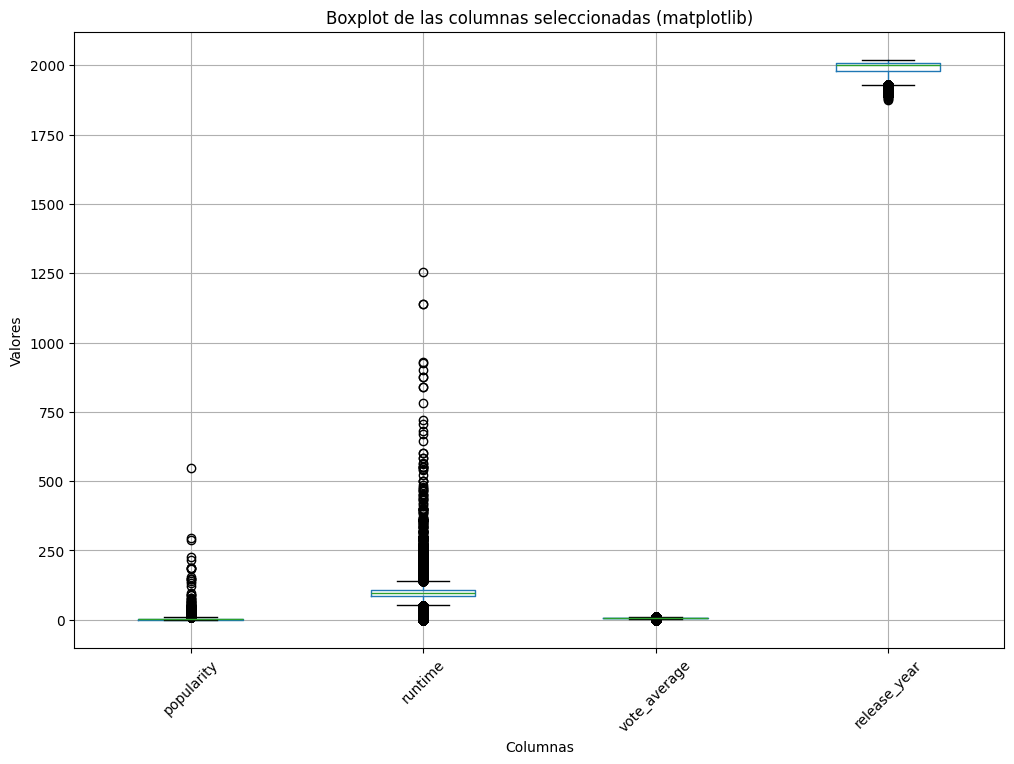

In [44]:
# Verifica las primeras filas del DataFrame para asegurarte de que tiene las columnas correctas
print("DataFrame:")
print(dfMoviesSintetico.head())

# Verifica la descripción de las columnas seleccionadas
columns_to_describe = ['popularity', 'runtime', 'vote_average', 'release_year']
print("\nDescripción de las columnas seleccionadas:")
print(dfMoviesSintetico[columns_to_describe].describe())  # Selección correcta de columnas

# Crear el boxplot con matplotlib
plt.figure(figsize=(12, 8))
dfMoviesSintetico.boxplot(column=columns_to_describe)
plt.title('Boxplot de las columnas seleccionadas (matplotlib)')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()


In [ ]:
# Filtrar solo las columnas numéricas
numeric_columns = dfMoviesSintetico_scaled.select_dtypes(include='number').drop(columns=['id_pelicula', 'id_collection', 'return'], inplace=False)

# Agregar una columna categórica para usar en hue en el pairplot
# Aquí, puedes usar una columna categórica relevante. En este ejemplo, se usará 'name_genres', pero puedes cambiarlo según tu necesidad.
dfMovies_filtered = dfMoviesSintetico_scaled.copy()  # Crear una copia del DataFrame original
dfMovies_filtered = dfMovies_filtered[numeric_columns.columns.tolist() + ['name_genres']]

# Filtrar para eliminar filas con valores NaN en la columna categórica (si es necesario)
dfMovies_filtered = dfMovies_filtered.dropna(subset=['name_genres'])

# Crear el pairplot
sns.pairplot(dfMovies_filtered, hue='name_genres', palette='tab10')  # 'tab10' es una paleta con hasta 10 colores distintos

# Mostrar el gráfico
plt.show()
